# Import required libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report


# Data Sourcing and Description

## Import dataset

In [4]:
# Load the mock dataset into a pandas dataframe
df = pd.read_excel('Housing_Labeled_Data.xlsx')

## Data Visualization and Testing Features (For Testing Purposes Only)

### Data Visualization

In [6]:
# number of observations and features
print(df.shape)
# data types of each column
df.dtypes

(3463, 18)


date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
street                   object
city                     object
statezip                 object
country                  object
dtype: object

In [7]:
# checking for missing values in each column
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [7]:
#Describing the data for better insights 
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,3.463000e+03,3463.000000,3463.000000,3463.000000,3.463000e+03,3463.000000,3463.000000,3463.000000,3463.000000,3463.000000,3463.000000,3463.000000,3463.000000
mean,5.542932e+05,3.399076,2.149437,2130.872076,1.498650e+04,1.509674,0.006930,0.246896,3.466936,1821.756281,309.115796,1970.402541,812.977187
std,6.114110e+05,0.917837,0.780418,967.301375,3.666458e+04,0.537294,0.082972,0.783625,0.689520,869.279335,459.964877,29.925089,980.054174
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.250000e+05,3.000000,1.750000,1450.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1950.000000,0.000000
50%,4.640000e+05,3.000000,2.250000,1960.000000,7.652000e+03,1.500000,0.000000,0.000000,3.000000,1580.000000,0.000000,1975.000000,0.000000
75%,6.500000e+05,4.000000,2.500000,2610.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4130.000000,2014.000000,2014.000000


Note: Noticed Unusual values

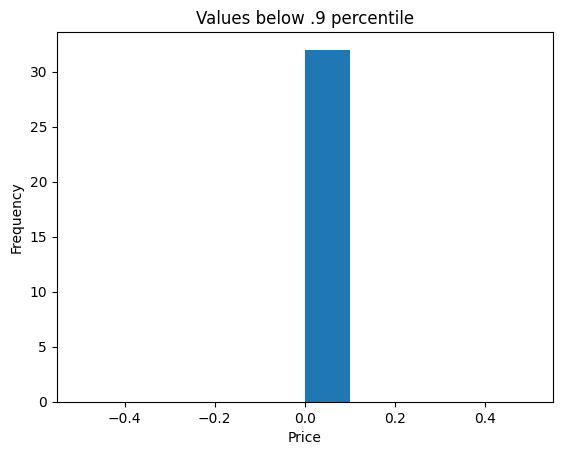

In [9]:
# Calculate the 1 percentile value
percentile_1 = df['price'].quantile(0.009)

# Create a new dataframe with values below the .9 percentile
df_below_percentile_1 = df[df['price'] <= percentile_1]

# Create a histogram of the values below the .9 percentile
plt.hist(df_below_percentile_1['price'], bins=10)
plt.title('Values below .9 percentile')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

concluded that I need to remove them

Note: seeing outliers visually 

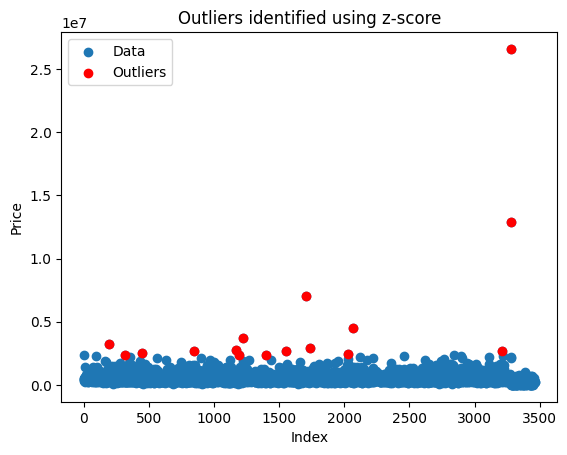

Number of Outliers: 16


In [10]:
# Calculate the z-score for each data point in the column
column_zscore = (df['price'] - df['price'].mean()) / df['price'].std()

# Define a threshold for the z-score
zscore_threshold = 3
# Identify outliers as any data point with a z-score above the threshold
outliers = df[column_zscore.abs() > zscore_threshold]
# Visualize the outliers in a scatter plot
plt.scatter(df.index, df['price'], label='Data')
plt.scatter(outliers.index, outliers['price'], color='r', label='Outliers')
plt.legend()
plt.title('Outliers identified using z-score')
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()
# Print the number of outliers
print("Number of Outliers:", len(outliers))

concluded that I need to remove them

Note: Visualizing normal correlation matrix

C:\Users\bachi\AppData\Local\Temp\ipykernel_5640\150317442.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


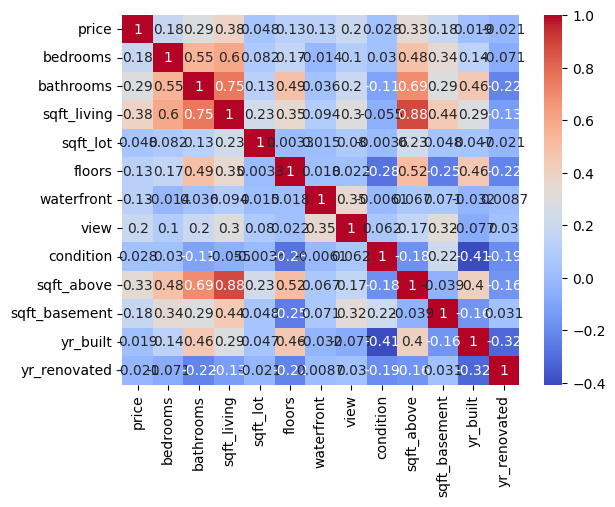

In [11]:
corr_matrix = df.corr()

# Create heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

concluded some columns that need to be dropped for varrious reasons later explaned when droping them

Note: Checking the correlation between price and diffferent neumarical columns

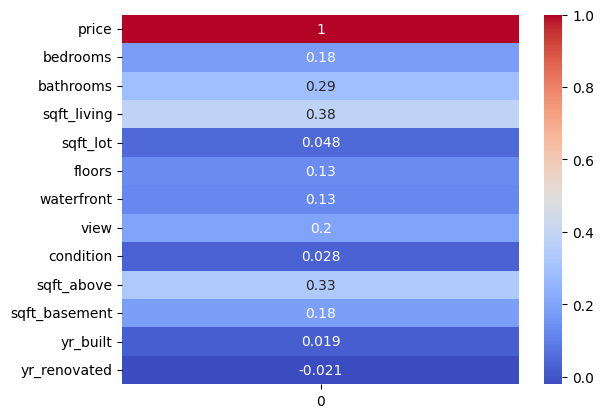

In [12]:
# Select two columns from the DataFrame
columns = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
              'waterfront', 'view', 'condition', 'sqft_above',  'sqft_basement',  'yr_built', 'yr_renovated']]

# Compute correlation matrix for the selected columns
corr_matrix = columns.corrwith(df['price'])

# Create heatmap
sns.heatmap(corr_matrix.to_frame(), cmap='coolwarm', annot=True)
plt.show()


concluded some columns that need to be dropped for varrious reasons later explaned when droping them

Note: Checking how many values does each columns have to check how relevent this property is it the model

In [13]:
# individually checking for all columns
df['waterfront'].value_counts()

# check for unuseful columns
print(df.value_counts())

date        price      bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  yr_renovated  street                  city         statezip  country
2014-05-02  235000.0   2         1.00       1210         9400      1.0     0           0     2          1210        0              1949      0             7542 21st Ave SW        Seattle      WA 98106  USA        1
2014-06-20  205000.0   3         1.00       960          7314      1.0     0           0     5          960         0              1960      0             604 Cedar Dr SE         Auburn       WA 98002  USA        1
2014-06-19  899000.0   4         2.25       2370         6000      1.0     0           2     3          1440        930            1959      1989          2411 NW Blue Ridge Dr   Seattle      WA 98177  USA        1
            930000.0   5         2.00       3530         9385      1.5     0           0     3          3530        0              1925      2002

concluded some columns that need to be dropped for varrious reasons later explaned when droping them

### Feature engineering and testing

Note: Turning categorical city column into a numerical column

I made a lot of heatmaps so that its easy to understand the correlation between the features and the target variable

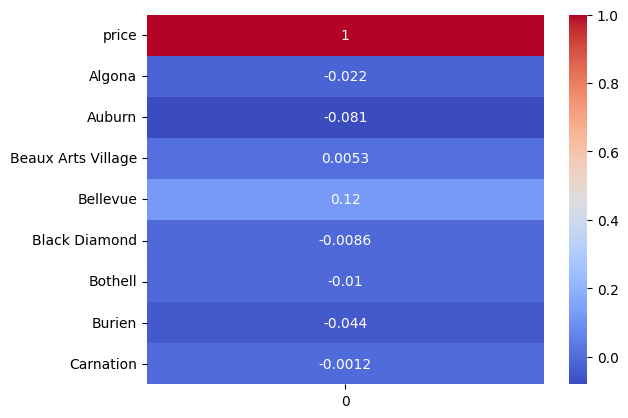

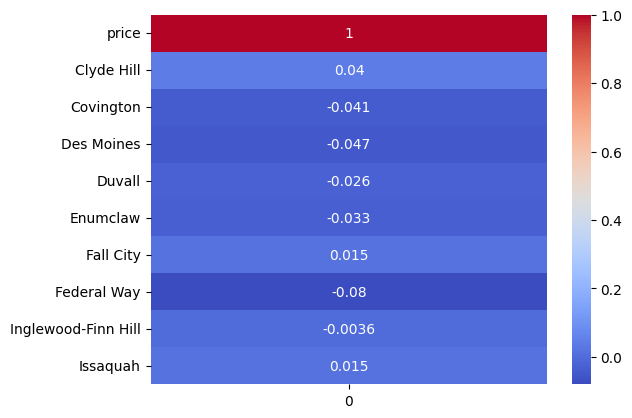

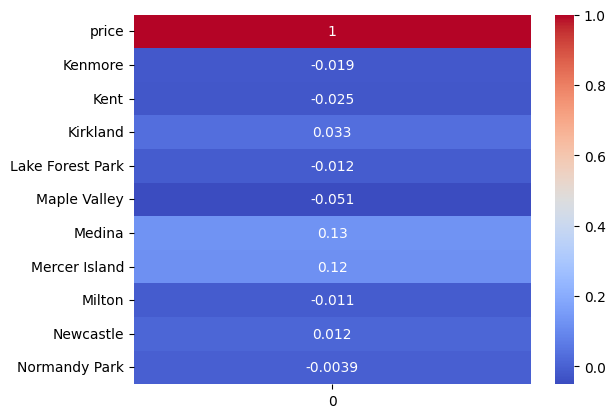

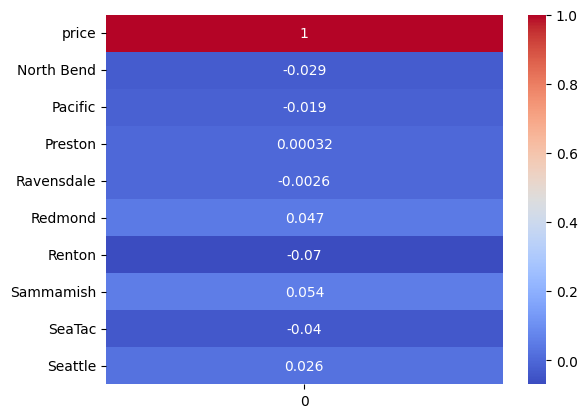

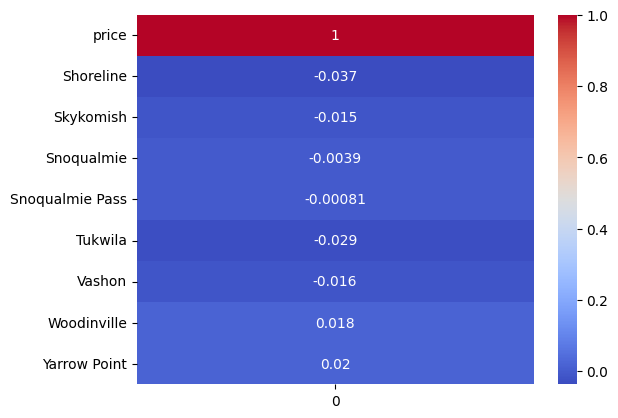

In [14]:
# one hot encoding for the city column and visualizing the correlation of the new columns with the price column
cities = pd.get_dummies(df['city'])
df = pd.concat([df, cities], axis=1)



# Selecting new columns from the DataFrame
columns = df[['price', 'Algona',  'Auburn', 'Beaux Arts Village', 'Bellevue', 'Black Diamond', 'Bothell', 'Burien', 'Carnation']]

# Compute correlation matrix for the selected columns
corr_matrix = columns.corrwith(df['price'])

# Create heatmap
sns.heatmap(corr_matrix.to_frame(), cmap='coolwarm', annot=True)
plt.show()

# Selecting new columns from the DataFrame
columns = df[['price', 'Clyde Hill', 'Covington', 'Des Moines', 'Duvall', 'Enumclaw', 'Fall City', 'Federal Way', 'Inglewood-Finn Hill', 'Issaquah']]

# Compute correlation matrix for the selected columns
corr_matrix = columns.corrwith(df['price'])

# Create heatmap
sns.heatmap(corr_matrix.to_frame(), cmap='coolwarm', annot=True)
plt.show()

# Selecting new columns from the DataFrame
columns = df[['price', 'Kenmore', 'Kent', 'Kirkland', 'Lake Forest Park', 'Maple Valley', 'Medina', 'Mercer Island', 'Milton', 'Newcastle', 'Normandy Park',]]

# Compute correlation matrix for the selected columns
corr_matrix = columns.corrwith(df['price'])


# Create heatmap
sns.heatmap(corr_matrix.to_frame(), cmap='coolwarm', annot=True)
plt.show()


# Selecting new columns from the DataFrame
columns = df[['price', 'North Bend', 'Pacific', 'Preston', 'Ravensdale', 'Redmond', 'Renton', 'Sammamish', 'SeaTac', 'Seattle']]

# Compute correlation matrix for the selected columns
corr_matrix = columns.corrwith(df['price'])

# Create heatmap
sns.heatmap(corr_matrix.to_frame(), cmap='coolwarm', annot=True)
plt.show()


# Selecting new columns from the DataFrame
columns = df[['price', 'Shoreline', 'Skykomish', 'Snoqualmie', 'Snoqualmie Pass', 'Tukwila', 'Vashon', 'Woodinville', 'Yarrow Point']]

# Compute correlation matrix for the selected columns
corr_matrix = columns.corrwith(df['price'])

# Create heatmap
sns.heatmap(corr_matrix.to_frame(), cmap='coolwarm', annot=True)
plt.show()

concluded that I need to drop the city columns with very low corr with the price 

Note: I'm creating a total square feet feature combining the square feet of living, lot, above and basement

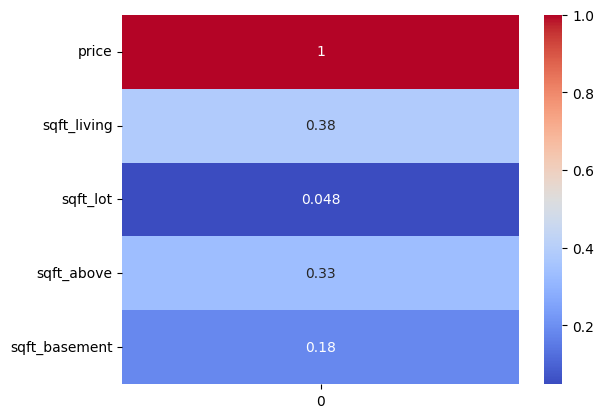

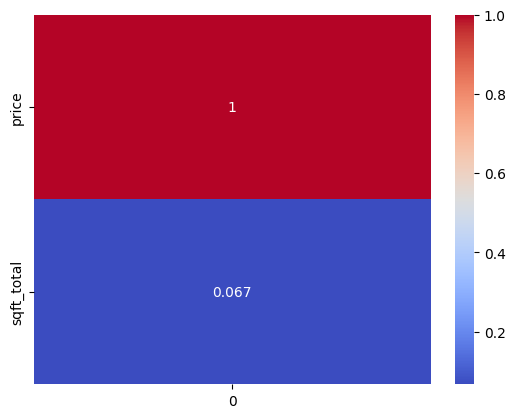

In [15]:
#checking the correlation before and after the new feature

columns = df[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']]

# Compute correlation matrix for the selected columns
corr_matrix = columns.corrwith(df['price'])

# Create heatmap
sns.heatmap(corr_matrix.to_frame(), cmap='coolwarm', annot=True)
plt.show()


# adding the sqft_living  sqft_lot sqft_above  sqft_basement to create a new column called sqft_total
df['sqft_total'] = df['sqft_living'] + df['sqft_lot'] + df['sqft_above'] + df['sqft_basement']

# visualizing the correlation of the new column with the price column
# Selecting new columns from the DataFrame
columns = df[['price', 'sqft_total']]

# Compute correlation matrix for the selected columns
corr_matrix = columns.corrwith(df['price'])

# Create heatmap
sns.heatmap(corr_matrix.to_frame(), cmap='coolwarm', annot=True)
plt.show()

concluded that this Feature is not relevent and the model is better without it

Note: I'm merging the yr_renovated and yr_built columns so that the year built column will have the value of the year renovated if the house was renovated

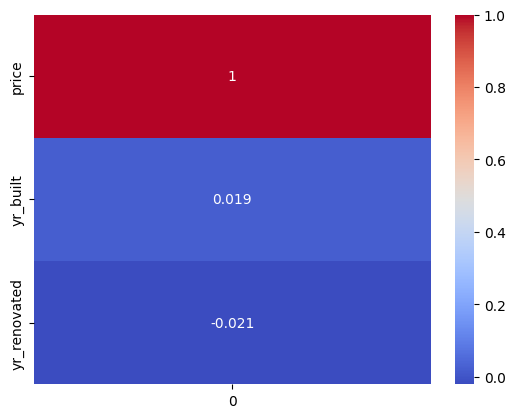

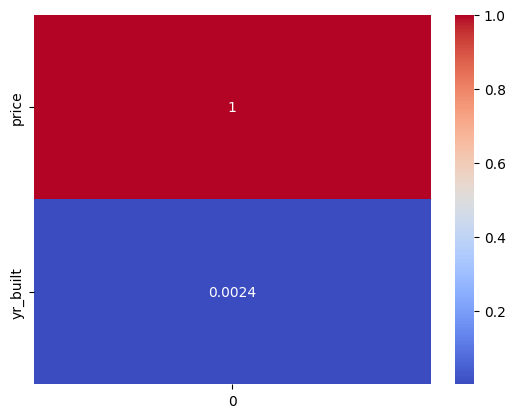

In [16]:
#checking the correlation before and after the new feature

columns = df[['price', 'yr_built', 'yr_renovated']]

# Compute correlation matrix for the selected columns
corr_matrix = columns.corrwith(df['price'])

# Create heatmap
sns.heatmap(corr_matrix.to_frame(), cmap='coolwarm', annot=True)
plt.show()

# replace the values in yr_built column with the values in yr_renovated column
df.loc[df['yr_renovated'] != 0, 'yr_built'] = df['yr_renovated']

columns = df[['price', 'yr_built']]

# Compute correlation matrix for the selected columns
corr_matrix = columns.corrwith(df['price'])

# Create heatmap
sns.heatmap(corr_matrix.to_frame(), cmap='coolwarm', annot=True)
plt.show()

concluded that this Feature is not relevent and the model is better without it

Note I'm turning the sqft_basement to a binary is_basement column

In [17]:
# Create a new column with 0s by default
df['is_basement'] = np.zeros(len(df))

# Replace all non-empty values in the new column with 1
df.loc[df['sqft_basement'] != "", 'is_basement'] = 1

# Convert the new column to integer type
df['is_basement'] = df['is_basement'].astype(int)

concluded after further testing that this featre is good/bad for the model so I will (not) use it

## Data Pre-processing

### Noticed unusual values in the price column, so I will remove them

In [8]:
# Calculate the 1 percentile value
percentile_1 = df['price'].quantile(0.009)

# Create a new dataframe with values below the .9 percentile
df_below_percentile_1 = df[df['price'] <= percentile_1]

# Remove any rows that have a value less than or equal to the .9 percentile value
df = df[df['price'] > percentile_1]


### Outlier treatment using z-score

In [9]:
# Calculate the z-score for each data point in the column
column_zscore = (df['price'] - df['price'].mean()) / df['price'].std()

# Define a threshold for the z-score
zscore_threshold = 3
# Identify outliers as any data point with a z-score above the threshold
outliers = df[column_zscore.abs() > zscore_threshold]

# Remove the outliers from the dataframe
df = df[column_zscore.abs() <= zscore_threshold]
# I dropped the outliers because they were not in the range of the other data points


### Droping columns that are not relevent


In [10]:
# drop unuseful columns
df.drop(['waterfront', 'country', 'date', 'statezip',
         'street', 'sqft_above', 'yr_renovated',
         'yr_built', 'condition', 'sqft_lot','view'], axis=1, inplace=True)

# dropped waterfront because it only had 23 values of 1 and 3408 values of 0
# dropped country because it only had 1 value of USA
# dropped date because it was not clear in the data where the date was from (it could be the date the house was sold or the date the house was built or the date the house data was collected)
# dropped statezip and street because they were unuseful for the model
# dropped sqft_above because it was highly correlated with sqft_living 
# dropped yr_renovated , yr_built, condition, and sqft_lot because they had very little correlation with price
# dropped view because it gave NaN values when I tried to use it in the model (I think it was because it had too many values of 0)

## Feature Generation and Transformation 

#### is_basement column turning sqft_basement into a binary column

In [11]:
# Create a new column with 0s by default
df['is_basement'] = np.zeros(len(df))

# Replace all non-empty values in the new column with 1
df.loc[df['sqft_basement'] != 0, 'is_basement'] = 1

# Convert the new column to integer type
df['is_basement'] = df['is_basement'].astype(int)

# drop the sqft_basement column
df.drop(['sqft_basement'], axis=1, inplace=True)


#### City column using one-hot encoding

In [12]:
# transforming city column into dummy variables
cities = pd.get_dummies(df['city'])
# concat the dummy variables with the original dataframe
df = pd.concat([df, cities], axis=1)
# drop the city column
df = df.drop(['city'], axis=1)

In [13]:
# Droping the columns that had very little correlation with price (decuced from the feature engineering and testing section)
df = df.drop([ 'Beaux Arts Village', 'Black Diamond', 'Bothell', 'Carnation', 'Fall City', 'Inglewood-Finn Hill', 
                'Issaquah', 'Lake Forest Park', 'Medina', 'Mercer Island', 'Milton', 'Newcastle', 'Normandy Park',
                  'Preston', 'Ravensdale', 'Skykomish', 'Snoqualmie', 'Snoqualmie Pass', 'Algona'], axis=1)

# Task 1: Predicting the Sale Price of a Property

### Defining the target variable and input variables

In [14]:
# defining the target
y = df['price']
X = df.drop(['price'], axis=1)

### Splitting the data into train and test sets

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Normalizing the data

In [16]:
# Create a scaler object for normalizing the features
scaler = StandardScaler()

# Fit the scaler to the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Predictive Modeling:

#### Linear Regression

In [17]:
# Create a linear regression object: lin_reg
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

#### Decision Tree Regression

In [18]:
# Create a DecisionTreeRegressor: tree_reg
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

#### Neural Network Regression

In [19]:
# Create a Neural Network regressor with 40 hidden units and a max of 40 iterations: nn_reg
nn_reg = MLPRegressor(hidden_layer_sizes=(40), max_iter=40, random_state=52)
nn_reg.fit(X_train_scaled, y_train)

c:\Users\bachi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=40, max_iter=40, random_state=52)

#### K-Nearest Neighbor Regression

In [20]:
# Create a KNN regressor with 5 neighbors: knn_reg
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_scaled, y_train)

KNeighborsRegressor()

#### Random Forest Regression

In [21]:
# Create a random forest regressor with 100 trees: rf_reg
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

#### Predictive Models

In [22]:
# Predict the labels of the test set
lin_reg_pred = lin_reg.predict(X_test_scaled)
tree_reg_pred = tree_reg.predict(X_test_scaled)
nn_reg_pred = nn_reg.predict(X_test_scaled)
knn_reg_pred = knn_reg.predict(X_test_scaled)
rf_reg_pred = rf_reg.predict(X_test_scaled)

### Evaluating the performance of the models

In [23]:
print('Linear Regression Metrics:')
print('MAE:', mean_absolute_error(y_test, lin_reg_pred))
print('MSE:', mean_squared_error(y_test, lin_reg_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, lin_reg_pred)))
print('R-squared:', r2_score(y_test, lin_reg_pred))
print('')

print('Decision Tree Regression Metrics:')
print('MAE:', mean_absolute_error(y_test, tree_reg_pred))
print('MSE:', mean_squared_error(y_test, tree_reg_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, tree_reg_pred)))
print('R-squared:', r2_score(y_test, tree_reg_pred))
print('')

print('Neural Network Regression Metrics:')
print('MAE:', mean_absolute_error(y_test, nn_reg_pred))
print('MSE:', mean_squared_error(y_test, nn_reg_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, nn_reg_pred)))
print('R-squared:', r2_score(y_test, nn_reg_pred))
print('')


print('K-Nearest Neighbors Regression Metrics:')
print('MAE:', mean_absolute_error(y_test, knn_reg_pred))
print('MSE:', mean_squared_error(y_test, knn_reg_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, knn_reg_pred)))
print('R-squared:', r2_score(y_test, knn_reg_pred))
print('')

print('Random Forest Regression Metrics:')
print('MAE:', mean_absolute_error(y_test, rf_reg_pred))
print('MSE:', mean_squared_error(y_test, rf_reg_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_reg_pred)))
print('R-squared:', r2_score(y_test, rf_reg_pred))
print('')

# best model
if r2_score(y_test, rf_reg_pred) > r2_score(y_test, lin_reg_pred) and r2_score(y_test, rf_reg_pred) > r2_score(y_test, tree_reg_pred) and r2_score(y_test, rf_reg_pred) > r2_score(y_test, nn_reg_pred) and r2_score(y_test, rf_reg_pred) > r2_score(y_test, knn_reg_pred):
    print('Random Forest Regression is the best model')
elif r2_score(y_test, lin_reg_pred) > r2_score(y_test, tree_reg_pred) and r2_score(y_test, lin_reg_pred) > r2_score(y_test, nn_reg_pred) and r2_score(y_test, lin_reg_pred) > r2_score(y_test, knn_reg_pred):
    print('Linear Regression is the best model')
elif r2_score(y_test, tree_reg_pred) > r2_score(y_test, nn_reg_pred) and r2_score(y_test, tree_reg_pred) > r2_score(y_test, knn_reg_pred):
    print('Decision Tree Regression is the best model')
elif r2_score(y_test, nn_reg_pred) > r2_score(y_test, knn_reg_pred):
    print('Neural Network Regression is the best model')
else:
    print('K-Nearest Neighbors Regression is the best model') 



Linear Regression Metrics:
MAE: 124970.53948952348
MSE: 39423150336.61815
RMSE: 198552.6387047479
R-squared: 0.6272967377065233

Decision Tree Regression Metrics:
MAE: 161115.0272007805
MSE: 68177426506.903946
RMSE: 261108.07438090447
R-squared: 0.35545614551521887

Neural Network Regression Metrics:
MAE: 530417.1164808425
MSE: 387105004970.92255
RMSE: 622177.6313649684
R-squared: -2.6596592857467667

K-Nearest Neighbors Regression Metrics:
MAE: 129753.46457722926
MSE: 45315830125.77965
RMSE: 212875.15149913492
R-squared: 0.571587821439845

Random Forest Regression Metrics:
MAE: 128839.03635394052
MSE: 42181247945.234604
RMSE: 205380.7389830765
R-squared: 0.6012219068602329

Linear Regression is the best model


MAE (Mean Absolute Error): It is the average absolute difference between the predicted and actual values. It is calculated by taking the average of the absolute difference between the predicted and actual values. MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. The lower the MAE, the better the model's performance.

MSE (Mean Squared Error): It is the average squared difference between the predicted and actual values. It is calculated by taking the average of the squared difference between the predicted and actual values. MSE measures the average of the squared errors, which means that the larger errors are penalized more than smaller ones. The lower the MSE, the better the model's performance.

RMSE (Root Mean Squared Error): It is the square root of the average squared difference between the predicted and actual values. It is calculated by taking the square root of the MSE. RMSE is a more interpretable version of MSE, and it represents the standard deviation of the residuals. The lower the RMSE, the better the model's performance.

R-squared: It is a statistical measure that represents the proportion of the variance in the dependent variable that is explained by the independent variables. It ranges from 0 to 1, where 0 means that the model does not explain any of the variance in the dependent variable, and 1 means that the model explains all of the variance in the dependent variable. R-squared is a useful metric for evaluating the overall performance of a regression model. The closer the R-squared is to 1, the better the model's performance.

#### Ressons why the model is giving bad results even after all the feature engineering and data pre-processing

Quality issues in the dataset: The quality issues in the dataset could be significant enough to prevent the model from learning the patterns and relationships within the data accurately. It could be that the data is incomplete, inconsistent, and this is affecting the model's ability to predict accurately.

Insufficient data: Even if the data is of high quality, there may not be enough of it to train a reliable predictive model. In such cases, the model may not have enough information to learn the underlying patterns and relationships that are necessary for accurate predictions.

It is possible for data quality issues to make it impossible to build an accurate predictive model. Poor data quality can include incomplete data, incorrect or inconsistent labels, or data entry errors. These issues can have a significant impact on the performance of a model, especially if they are systematic or widespread across the dataset. If the data quality issues are severe enough, they can limit the ability of a model to capture the true relationships in the data. In some cases, it may be necessary to collect additional data.

## Buisness Insights for Task 1 


Feature Importance: Even if the model is not performing well overall, it may still be able to identify important features that are strongly correlated with the target variable. Analyzing the feature importance can help understand which factors are most important in determining the price of a house.

Market Trends: The data can be used to analyze market trends and understand how different factors are impacting the housing market. (Data Visualization and Testing Features section)

Customer Preferences: Use the data analysis to understand what features or characteristics customers are looking for when buying a house. This can help identify opportunities for differentiation or to develop targeted marketing strategies. (Data Visualization and Testing Features section)

Competitive Analysis: Use data to compare the prices of houses in different cities, and to understand the competitive landscape in the housing market. (Data Visualization and Testing Features section)

So even though the model is not performing well, it can still be used to identify important features that are strongly correlated with the target variable. Analyzing the feature importance can help understand which factors are most important in determining the price of a house.

# Task 2: Classification Model

## Creating a new column for the price range

In [24]:
# Create binary target variable
df['price_class'] = (df['price'] > 750000).astype(int)

## Splitting the data into train and test sets

In [25]:
# Split data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(df.drop(['price', 'price_class'], axis=1), df['price_class'], test_size=0.3, random_state=42)

## Predictive Modeling

### Logistic Regression

#### Training the model

In [26]:
# Define and fit logistic regression model
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

# Predict using the trained model
pred_logistic = model_logistic.predict(X_test)

c:\Users\bachi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Evaluating the model

   precision    recall  f1-score  support
0   0.923077  0.969555  0.945745    854.0
1   0.796875  0.596491  0.682274    171.0

Accuracy: 0.9073170731707317


<Axes: >

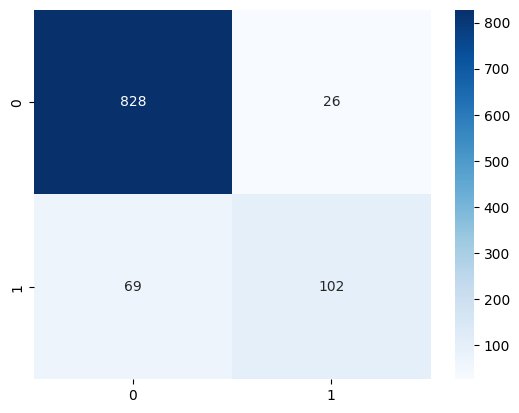

In [27]:
# Generate classification report
report = classification_report(y_test, pred_logistic, output_dict=True)

# Convert report to a dictionary
report_dict = classification_report(y_test, pred_logistic, digits=4, output_dict=True)

# Create a pandas DataFrame from the report dictionary
df = pd.DataFrame(report_dict).transpose()

# Select rows corresponding to classes 0 and 1
df = df.loc[['0', '1'], ['precision', 'recall', 'f1-score', 'support']]

# Print the DataFrame
print(df)
print('')

# Print the accuracy of the model
print('Accuracy:', accuracy_score(y_test, pred_logistic))

# print the confusion matrix on a heatmap
sns.heatmap(confusion_matrix(y_test, pred_logistic), annot=True, fmt='d', cmap='Blues')

### Decision Tree Classifier

#### Training the model

In [28]:
# Define and fit Decision Tree model
model_DecisionTree = DecisionTreeClassifier()
model_DecisionTree.fit(X_train, y_train)

# Predict using the trained model
pred_DecisionTree = model_DecisionTree.predict(X_test)

#### Evaluating the model

   precision    recall  f1-score  support
0   0.925178  0.912178  0.918632    854.0
1   0.590164  0.631579  0.610169    171.0

Accuracy: 0.8653658536585366


<Axes: >

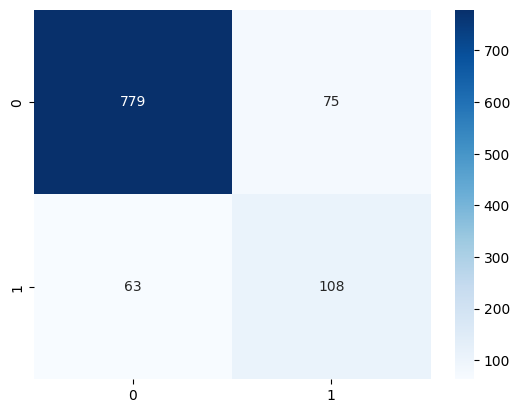

In [29]:
# Generate classification report
report = classification_report(y_test, pred_DecisionTree, output_dict=True)

# Convert report to a dictionary
report_dict = classification_report(y_test, pred_DecisionTree, digits=4, output_dict=True)

# Create a pandas DataFrame from the report dictionary
df = pd.DataFrame(report_dict).transpose()

# Select rows corresponding to classes 0 and 1
df = df.loc[['0', '1'], ['precision', 'recall', 'f1-score', 'support']]

# Print the DataFrame
print(df)
print('')

# Print the accuracy of the model
print('Accuracy:', accuracy_score(y_test, pred_DecisionTree))

# print the confusion matrix on a heatmap
sns.heatmap(confusion_matrix(y_test, pred_DecisionTree), annot=True, fmt='d', cmap='Blues')

### Random Forest Classifier

#### Training the model

In [30]:

# Define and fit Random Forest model
model_RandomForest = RandomForestClassifier()
model_RandomForest.fit(X_train, y_train)

# Predict using the trained model
pred_RandomForest = model_RandomForest.predict(X_test)

#### Evaluating the model

   precision    recall  f1-score  support
0   0.935706  0.954333  0.944928    854.0
1   0.746753  0.672515  0.707692    171.0

Accuracy: 0.9073170731707317


<Axes: >

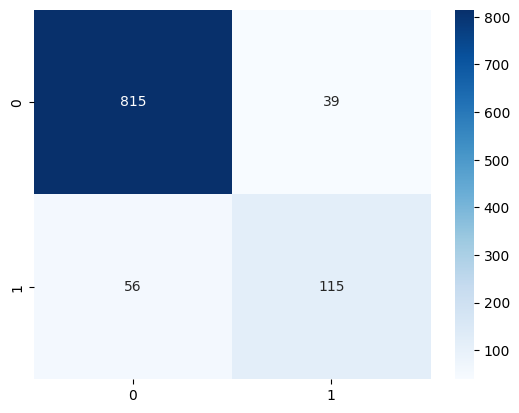

In [31]:
# Generate classification report
report = classification_report(y_test, pred_RandomForest, output_dict=True)

# Convert report to a dictionary
report_dict = classification_report(y_test, pred_RandomForest, digits=4, output_dict=True)

# Create a pandas DataFrame from the report dictionary
df = pd.DataFrame(report_dict).transpose()

# Select rows corresponding to classes 0 and 1
df = df.loc[['0', '1'], ['precision', 'recall', 'f1-score', 'support']]
# Print the DataFrame
print(df)
print('')

# Print the accuracy of the model
print('Accuracy:', accuracy_score(y_test, pred_RandomForest))

# print the confusion matrix on a heatmap
sns.heatmap(confusion_matrix(y_test, pred_RandomForest), annot=True, fmt='d', cmap='Blues')

### Support Vector Machine

#### Training the model

In [32]:
# Define and fit support vector machine classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predict using the trained models
svm_pred = svm_model.predict(X_test)

#### Evaluating the model

   precision    recall  f1-score  support
0   0.884289  0.975410  0.927617    854.0
1   0.746988  0.362573  0.488189    171.0

Accuracy: 0.8731707317073171


<Axes: >

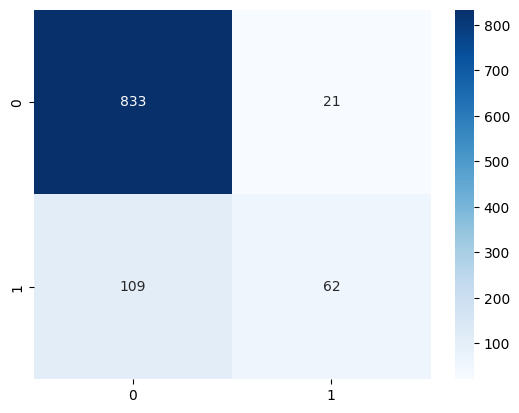

In [33]:
# Generate classification report
report = classification_report(y_test, svm_pred, output_dict=True)

# Convert report to a dictionary
report_dict = classification_report(y_test, svm_pred, digits=4, output_dict=True)

# Create a pandas DataFrame from the report dictionary
df = pd.DataFrame(report_dict).transpose()

# Select rows corresponding to classes 0 and 1
df = df.loc[['0', '1'], ['precision', 'recall', 'f1-score', 'support']]
# Print the DataFrame
print(df)
print('')

# Print the accuracy of the model
print('Accuracy:', accuracy_score(y_test, svm_pred))

# print the confusion matrix on a heatmap
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt='d', cmap='Blues')

### Neural Network Classifier

#### Training the model


In [34]:
# Define and fit neural network model
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, solver='adam', random_state=42)
nn_model.fit(X_train, y_train)

# Predict using the trained model
nn_pred = nn_model.predict(X_test)

#### Evaluating the model

   precision    recall  f1-score  support
0   0.928241  0.939110  0.933644    854.0
1   0.677019  0.637427  0.656627    171.0

Accuracy: 0.8887804878048781


<Axes: >

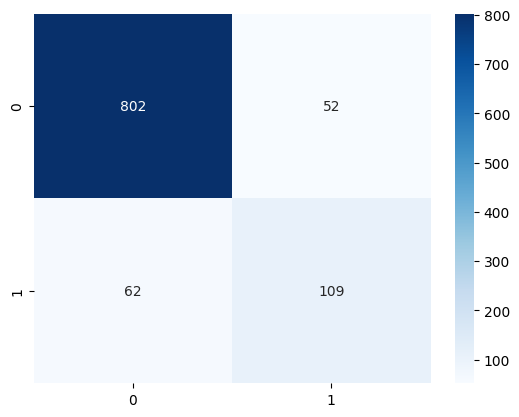

In [35]:
# Generate classification report
report = classification_report(y_test, nn_pred, output_dict=True)

# Convert report to a dictionary
report_dict = classification_report(y_test, nn_pred, digits=4, output_dict=True)

# Create a pandas DataFrame from the report dictionary
df = pd.DataFrame(report_dict).transpose()

# Select rows corresponding to classes 0 and 1
df = df.loc[['0', '1'], ['precision', 'recall', 'f1-score', 'support']]
# Print the DataFrame
print(df)
print('')

# Print the accuracy of the model
print('Accuracy:', accuracy_score(y_test, nn_pred))

# print the confusion matrix on a heatmap
sns.heatmap(confusion_matrix(y_test, nn_pred), annot=True, fmt='d', cmap='Blues')

In [36]:
# deducing the best model
# Define a list of models
models = [('Logistic Regression', model_logistic),
            ('Decision Tree', model_DecisionTree),
            ('Random Forest', model_RandomForest),
            ('Support Vector Machine', svm_model),
            ('Neural Network', nn_model)]

# Define a list to store the accuracy of each model
accuracy = []

# Loop through the list of models and store the accuracy of each in the accuracy list
for name, model in models:
    pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, pred))

# Create a pandas DataFrame with the accuracy of each model
df = pd.DataFrame({'Model': [name for name, model in models], 'Accuracy': accuracy})

# Print the DataFrame
print(df)
print('')

# select the best model
if df['Accuracy'].max() == df['Accuracy'][0]:
    print('Logistic Regression is the best model')
elif df['Accuracy'].max() == df['Accuracy'][1]:
    print('Decision Tree is the best model')
elif df['Accuracy'].max() == df['Accuracy'][2]:
    print('Random Forest is the best model')
elif df['Accuracy'].max() == df['Accuracy'][3]:
    print('Support Vector Machine is the best model')
else:
    print('Neural Network is the best model')

                    Model  Accuracy
0     Logistic Regression  0.907317
1           Decision Tree  0.865366
2           Random Forest  0.907317
3  Support Vector Machine  0.873171
4          Neural Network  0.888780

Logistic Regression is the best model



# Applying the best models from task 1 and task 2 on the unlabeled data

## Loading the unlabeled data

In [37]:
# Load the Excel file into a Pandas DataFrame
data = pd.read_excel('Housing_Unlabeled_Data.xlsx')

## Prossesing the data

In [ ]:
# drop unuseful columns
data.drop(['waterfront', 'country', 'date', 'statezip', 'street', 'sqft_above', 'yr_renovated', 'yr_built', 'condition', 'sqft_lot','view'], axis=1, inplace=True)

# Create a new column with 0s by default
data['is_basement'] = np.zeros(len(data))

# Replace all non-empty values in the new column with 1
data.loc[data['sqft_basement'] != 0, 'is_basement'] = 1
# Convert the new column to integer type
data['is_basement'] = data['is_basement'].astype(int)
# drop the sqft_basement column
data.drop(['sqft_basement'], axis=1, inplace=True)

cities = pd.get_dummies(data['city'])
data = pd.concat([data, cities], axis=1)
data = data.drop(['city'], axis=1)


# Droping the columns that had very little correlation with price (decuced from the feature engineering and testing section)
data = data.drop(['Black Diamond', 'Bothell', 'Carnation', 'Fall City', 
                'Issaquah', 'Lake Forest Park', 'Medina', 'Mercer Island',
                  'Newcastle', 'Normandy Park', 'Ravensdale', 'Snoqualmie'], axis=1)

## Applying the models

In [ ]:
# Extract the features to be normalized
features = data.drop(['Predicted Price (Task 1)', 'Predicted Price (if > 750k) (Task 2)'], axis=1)


# Normalize the features of the new data
normalized_features = scaler.transform(features)

# Use the normalized features to make predictions with your trained model
predictions = lin_reg.predict(normalized_features)

Classification = model_logistic.predict(normalized_features)

# Save the predictions back to the Excel file
data['Predicted Price (Task 1)'] = predictions
data['Predicted Price (if > 750k) (Task 2)'] = Classification

## Saving the results

In [40]:
# Load the existing Excel file into a Pandas dataframe
unlabeled_data = pd.read_excel('Housing_Unlabeled_Data.xlsx')

# Replace the values in the "Predicted Price (Task 1)" column with the predictions
unlabeled_data['Predicted Price (Task 1)'] = predictions

# Replace the values in the "Predicted Price (if > 750k) (Task 2)" column with the classification results
unlabeled_data['Predicted Price (if > 750k) (Task 2)'] = Classification

# Save the updated dataframe back to the same Excel file
unlabeled_data.to_excel('Housing_Unlabeled_Data.xlsx', index=False)